<a href="https://colab.research.google.com/github/jiku100/2020-2-machine-running-proejct/blob/master/assignment6/%EC%8B%A0%EC%84%9D%EA%B2%BD_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regularization**

# 1. Load Data
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import data with numpy
data_train  = np.loadtxt('training.txt', delimiter=',')
data_test   = np.loadtxt('testing.txt', delimiter=',')

# number of training data
number_data_train   = data_train.shape[0] 
number_data_test    = data_test.shape[0]

# training data
x1_train            = data_train[:,0] # feature 1
x2_train            = data_train[:,1] # feature 2
idx_class0_train    = (data_train[:,2]==0) # index of class0
idx_class1_train    = (data_train[:,2]==1) # index of class1

# testing data
x1_test             = data_test[:,0] # feature 1
x2_test             = data_test[:,1] # feature 2
idx_class0_test     = (data_test[:,2]==0) # index of class0
idx_class1_test     = (data_test[:,2]==1) # index of class1

print(f"x1_train shape = {x1_train.shape}")
print(f"x2_train shape = {x2_train.shape}")
print(f"label_train shape = {data_train[:, 2].shape}")

print(f"x1_test shape = {x1_test.shape}")
print(f"x2_test shape = {x2_test.shape}")
print(f"label_test shape = {data_test[:, 2].shape}")

x1_train shape = (200,)
x2_train shape = (200,)
label_train shape = (200,)
x1_test shape = (200,)
x2_test shape = (200,)
label_test shape = (200,)


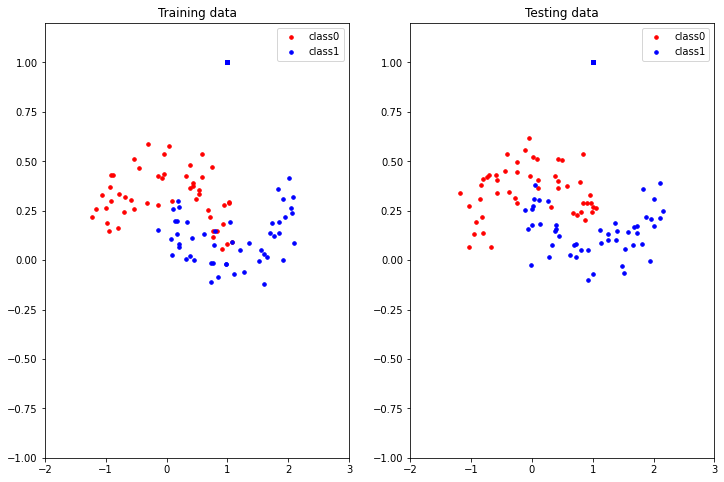

In [14]:
f = plt.figure(1, figsize=(12,8))
ax1 = f.add_subplot(121)
ax1.set(xlim=[-2, 3], ylim=[-1, 1.2], title='Training data')
ax1.scatter(x1_train[idx_class0_train], x2_train[idx_class0_train], s=50, c='r', marker=".", label="class0")
ax1.scatter(x1_train[idx_class1_train], x2_train[idx_class1_train], s=50, c='b', marker=".", label="class1")
ax1.legend()

ax2 = f.add_subplot(122)
ax2.set(xlim=[-2, 3], ylim=[-1, 1.2], title='Testing data')
ax2.scatter(x1_test[idx_class0_train], x2_test[idx_class0_train], s=50, c='r', marker=".", label="class0")
ax2.scatter(x1_test[idx_class1_train], x2_test[idx_class1_train], s=50, c='b', marker=".", label="class1")
ax2.legend()

plt.show()

# 2. Make train, test, theta Matrix
<hr>

In [90]:
## make train theta and train matrix
n = data_train.shape[0]
theta = np.zeros((9*9))[:,None]
X_train = np.ones((n,9*9))

k = 0;
for i in range(9):
  for j in range(9):
    X_train[:,k] = pow(x1_train, i) * pow(x2_train, j)
    k += 1

## make test matrix
X_test = np.ones((n,9*9))

k = 0
for i in range(9):
  for j in range(9):
    X_test[:,k] = pow(x1_test, i) * pow(x2_test, j)
    k += 1

# print matrix shape
print(f"theta shape = {theta.shape}")
print(f"X_train shape = {X_train.shape}")
print(f"X_test shape = {X_test.shape}")

theta shape = (81, 1)
X_train shape = (200, 81)
X_test shape = (200, 81)


# 3. Define a logistic regression loss function and its gradient
<hr>

In [91]:
# sigmoid function
def sigmoid(z):
    sigmoid_f = 1/(1+np.exp(-z))
    return sigmoid_f 

# predictive function definition
def f_pred(X,theta): 
    p = sigmoid(np.dot(X,w))
    return p

# loss function definition
def loss_logreg(y_pred,y, theta, lda): 
    n = len(y)
    y_pred = np.clip(y_pred, 1e-10, 1-1e-10)
    loss = -1/n * (np.dot(y.T, np.log(y_pred)) + np.dot((1-y).T, np.log(1-y_pred))) + lda/2 * np.dot(theta.T, theta)
    return loss

# gradient function definition
def grad_loss_ce(y_pred, y, X, theta, lda):
    n = len(y)
    grad = 1/n * np.dot(X.T, (y_pred - y)) + lda * theta
    return grad

In [79]:
print(np.sum(X_train).shape)

()


In [87]:
a1 = np.array([[[1,1,1],[1,1,1],[1,1,1]],[[2,2,2],[2,2,2],[2,2,2]],[[3,3,3],[3,3,3],[3,3,3]]])
a2 = np.array([[4,4,4],[4,4,4],[4,4,4]])
print(a2.shape)
b1 = np.sum(a1*a2, axis=(1,2))
print((b1))

(3, 3)
[ 36  72 108]
